# **Credit Card Fraud Detection**
* Created by : Hilman Singgih Wicaksana, S.Kom., M.Kom.
* Graduated/Alumni from : Diponegoro University (2024) | Located in: Semarang, Central Java, Indonesia
* E-mail : singgih.hilman@gmail.com / hilmansinggihw@alumni.undip.ac.id
* Research interest : Machine Learning, Deep Learning, Information System

## Import Library

In [1]:
# General Library
import os
import time
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
# Import Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
portfolio_path = '/content/drive/MyDrive/dataset/portofolio/fraud_detection/'
df = pd.read_csv(portfolio_path + 'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Understanding

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Feature Selection

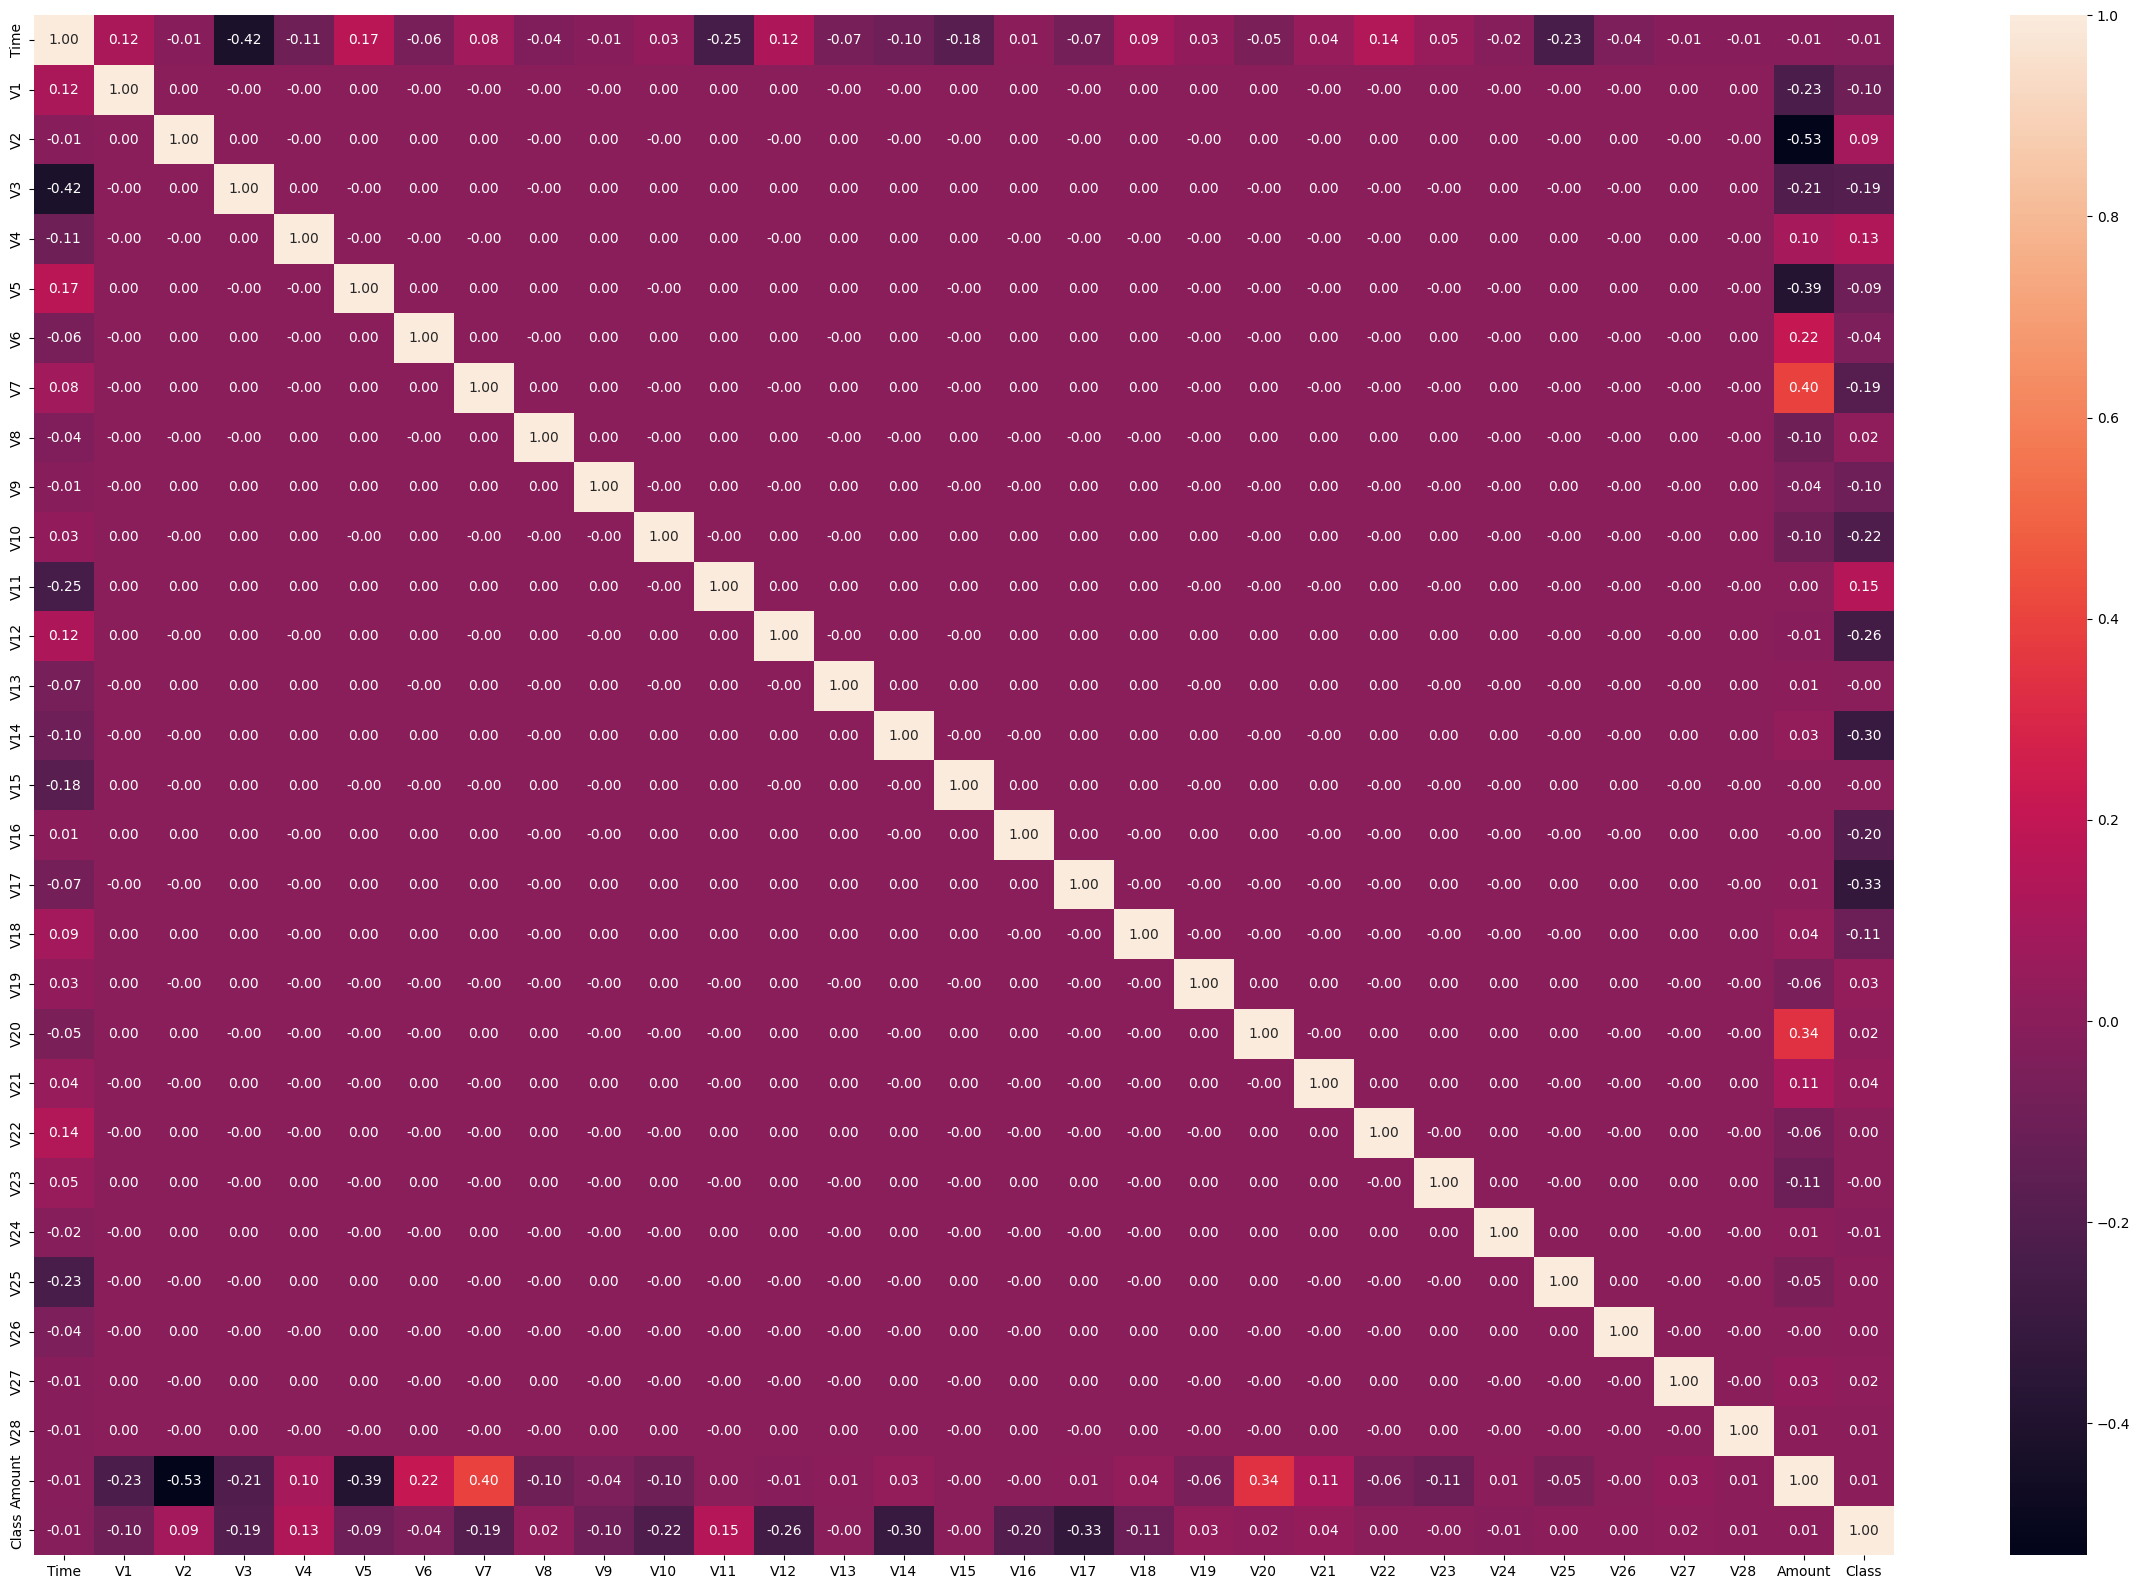

In [7]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cbar = 'coolwarm', annot = True, fmt = "0.2f")

for corr,column in zip(df.corr().iloc[30],df.columns):
    if abs(corr)<0.13:
        df.drop(columns = column , inplace = True)

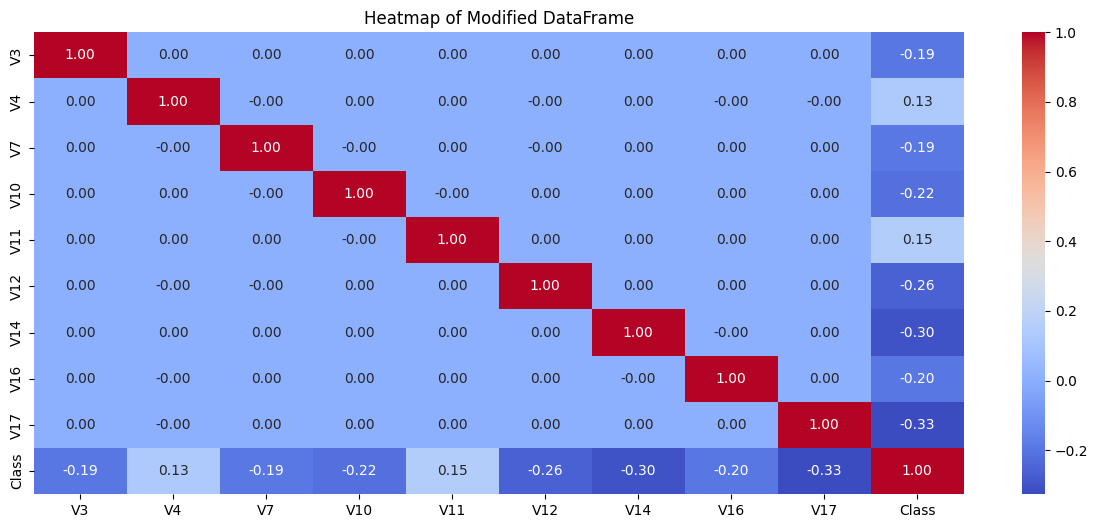

In [8]:
plt.figure(figsize=(15,6))
plt.title('Heatmap of Modified DataFrame')
sns.heatmap(df.corr(),cmap='coolwarm',fmt='0.2f',annot = True)
plt.show()

## Plotting Data

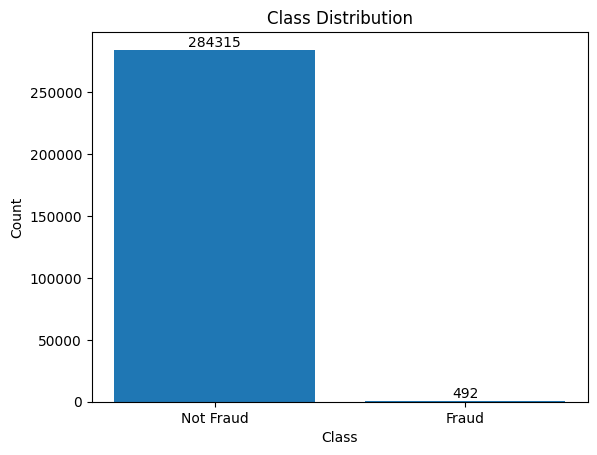

In [9]:
class_count = df['Class'].value_counts()
class_dict = {0: 'Not Fraud', 1: 'Fraud'}
plt.bar(class_dict.values(), class_count.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
for i, count in enumerate(class_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

## Data Resampling

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Shape of X:", X_resampled.shape)
print("Shape of y:", y_resampled.shape)

Shape of X: (984, 9)
Shape of y: (984,)


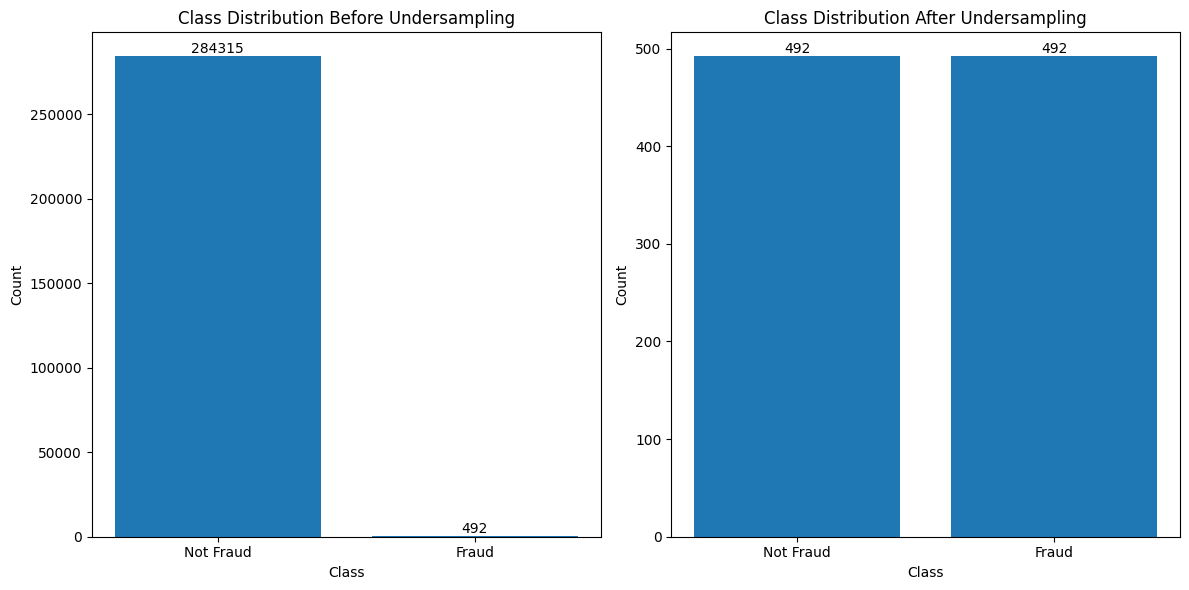

In [11]:
# Plotting Classes Before and After Undersampling
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Before Undersampling
class_count_before = df['Class'].value_counts()
ax[0].bar(class_dict.values(), class_count_before.values)
ax[0].set_title('Class Distribution Before Undersampling')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')
for i, count in enumerate(class_count_before.values):
    ax[0].text(i, count, str(count), ha='center', va='bottom')

# After Undersampling
class_count_after = y_resampled.value_counts()
ax[1].bar(class_dict.values(), class_count_after.values)
ax[1].set_title('Class Distribution After Undersampling')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')
for i, count in enumerate(class_count_after.values):
    ax[1].text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Splitting Dataset

In [12]:
# Splitting dataset from the undersampling dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
# Shape of X_train, X_test, y_train, and y_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (787, 9)
Shape of X_test: (197, 9)
Shape of y_train: (787,)
Shape of y_test: (197,)


# Modelling

### a) Logistic Regression

In [14]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a logistic regression model
logreg = LogisticRegression()

# Perform Grid Search Cross-Validation with 10 folds
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)

# Fit the model to the training data
best_logreg.fit(X_train, y_train)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=0.01, solver='liblinear')

In [15]:
# Predict on the test data
y_pred_logreg = best_logreg.predict(X_test)

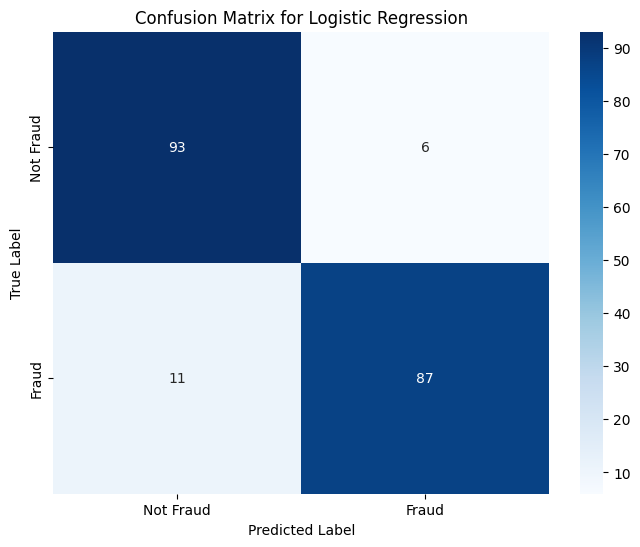

In [16]:
# Generate confusion matrix
cm1 = confusion_matrix(y_test, y_pred_logreg)

# Define class labels
class_labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
# Generate and print classification report
class_dict = {0: 'Not Fraud', 1: 'Fraud'}
print(classification_report(y_test, y_pred_logreg, target_names=class_dict.values(), digits=4))

              precision    recall  f1-score   support

   Not Fraud     0.8942    0.9394    0.9163        99
       Fraud     0.9355    0.8878    0.9110        98

    accuracy                         0.9137       197
   macro avg     0.9149    0.9136    0.9136       197
weighted avg     0.9148    0.9137    0.9136       197



In [18]:
# Create a DataFrame from the test features and predicted labels
results_df = pd.DataFrame(X_test)
results_df['True_Label'] = y_test
results_df['Predicted_Label'] = y_pred_logreg

# Display the DataFrame
results_df

,V3,V4,V7,V10,V11,V12,V14,V16,V17,True_Label,Predicted_Label
42756,-11.671043,8.807369,-13.616797,-12.888158,6.854953,-13.211695,-13.778956,-11.290328,-20.578022,1,1
1686,2.647870,1.408111,0.960251,1.346832,-0.622458,0.516210,-2.023273,-2.036791,0.653358,0,0
111690,-3.917586,3.920748,-3.614445,-4.684233,4.376907,-5.007441,-6.192475,-3.316934,-6.188834,1,1
128360,0.793623,-0.218410,0.363563,-0.774565,-1.133336,-0.066681,0.500851,0.149958,-0.210491,0,0
20746,0.485043,1.343874,-0.076665,0.065573,1.192505,0.810490,0.455426,-0.543406,0.138989,0,0
...,...,...,...,...,...,...,...,...,...,...,...
89723,1.069516,1.501387,-0.316986,-0.338931,-0.389865,1.288650,-0.552512,-1.000086,0.519668,0,0
200118,-1.787544,0.339969,0.084754,-0.760468,1.036545,0.956843,-1.423610,0.257045,0.873964,0,0
6641,-7.423894,7.380245,-1.496497,-3.944238,6.355078,-7.309748,-9.057993,-1.073117,1.524501,1,1
33631,0.765152,-1.183354,-1.044208,1.462230,-0.242670,-1.629023,0.093332,-0.336101,0.772681,0,0


In [19]:
# Reset index from the DataFrame
results_df = results_df.reset_index(drop=True)

# Display the DataFrame
results_df

,V3,V4,V7,V10,V11,V12,V14,V16,V17,True_Label,Predicted_Label
0,-11.671043,8.807369,-13.616797,-12.888158,6.854953,-13.211695,-13.778956,-11.290328,-20.578022,1,1
1,2.647870,1.408111,0.960251,1.346832,-0.622458,0.516210,-2.023273,-2.036791,0.653358,0,0
2,-3.917586,3.920748,-3.614445,-4.684233,4.376907,-5.007441,-6.192475,-3.316934,-6.188834,1,1
3,0.793623,-0.218410,0.363563,-0.774565,-1.133336,-0.066681,0.500851,0.149958,-0.210491,0,0
4,0.485043,1.343874,-0.076665,0.065573,1.192505,0.810490,0.455426,-0.543406,0.138989,0,0
...,...,...,...,...,...,...,...,...,...,...,...
192,1.069516,1.501387,-0.316986,-0.338931,-0.389865,1.288650,-0.552512,-1.000086,0.519668,0,0
193,-1.787544,0.339969,0.084754,-0.760468,1.036545,0.956843,-1.423610,0.257045,0.873964,0,0
194,-7.423894,7.380245,-1.496497,-3.944238,6.355078,-7.309748,-9.057993,-1.073117,1.524501,1,1
195,0.765152,-1.183354,-1.044208,1.462230,-0.242670,-1.629023,0.093332,-0.336101,0.772681,0,0


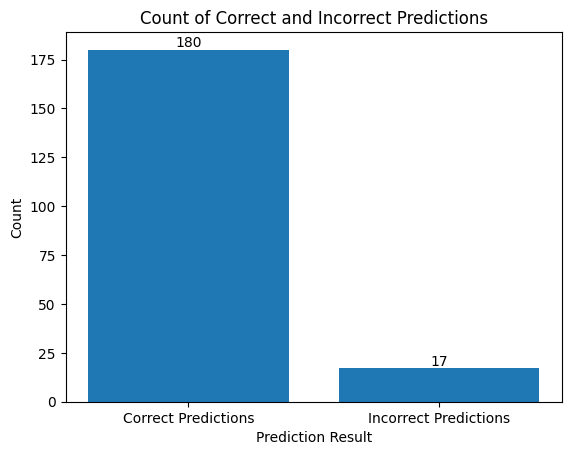

In [20]:
# Count the number of correct and incorrect predictions
correct_predictions = results_df[results_df['True_Label'] == results_df['Predicted_Label']].shape[0]
incorrect_predictions = results_df[results_df['True_Label'] != results_df['Predicted_Label']].shape[0]

# Create a bar plot
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_predictions, incorrect_predictions])
plt.xlabel('Prediction Result')
plt.ylabel('Count')
plt.title('Count of Correct and Incorrect Predictions')

# Add count labels above the bars
for i, count in enumerate([correct_predictions, incorrect_predictions]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### b) Support Vector Machine

In [21]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svm = SVC()

# Perform Grid Search Cross-Validation with 10 folds
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new SVM model with the best hyperparameters
best_svm = SVC(**best_params)

# Fit the model to the training data
best_svm.fit(X_train, y_train)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=10)

In [22]:
# Predict on the test data
y_pred_svm = best_svm.predict(X_test)

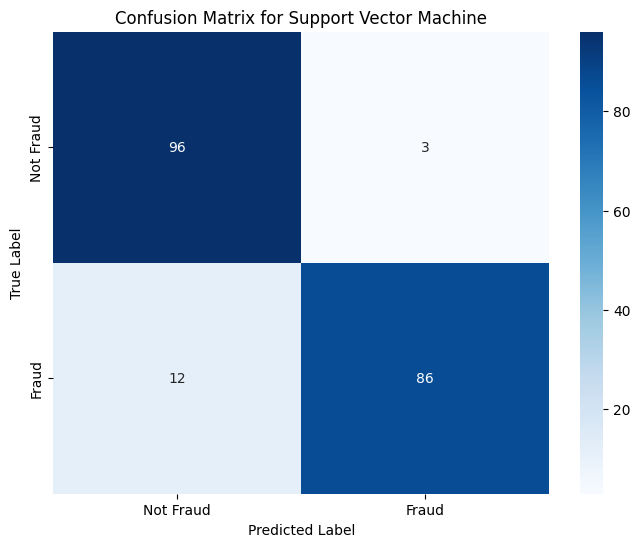

In [23]:
# Generate confusion matrix
cm2 = confusion_matrix(y_test, y_pred_svm)

# Define class labels
class_labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
# Generate and print classification report
class_dict = {0: 'Not Fraud', 1: 'Fraud'}
print(classification_report(y_test, y_pred_svm, target_names=class_dict.values(), digits=4))

              precision    recall  f1-score   support

   Not Fraud     0.8889    0.9697    0.9275        99
       Fraud     0.9663    0.8776    0.9198        98

    accuracy                         0.9239       197
   macro avg     0.9276    0.9236    0.9237       197
weighted avg     0.9274    0.9239    0.9237       197



In [25]:
# Create a DataFrame from the test features and predicted labels
results_df2 = pd.DataFrame(X_test)
results_df2['True_Label'] = y_test
results_df2['Predicted_Label'] = y_pred_svm

# Display the DataFrame
results_df2

,V3,V4,V7,V10,V11,V12,V14,V16,V17,True_Label,Predicted_Label
42756,-11.671043,8.807369,-13.616797,-12.888158,6.854953,-13.211695,-13.778956,-11.290328,-20.578022,1,1
1686,2.647870,1.408111,0.960251,1.346832,-0.622458,0.516210,-2.023273,-2.036791,0.653358,0,0
111690,-3.917586,3.920748,-3.614445,-4.684233,4.376907,-5.007441,-6.192475,-3.316934,-6.188834,1,1
128360,0.793623,-0.218410,0.363563,-0.774565,-1.133336,-0.066681,0.500851,0.149958,-0.210491,0,0
20746,0.485043,1.343874,-0.076665,0.065573,1.192505,0.810490,0.455426,-0.543406,0.138989,0,0
...,...,...,...,...,...,...,...,...,...,...,...
89723,1.069516,1.501387,-0.316986,-0.338931,-0.389865,1.288650,-0.552512,-1.000086,0.519668,0,0
200118,-1.787544,0.339969,0.084754,-0.760468,1.036545,0.956843,-1.423610,0.257045,0.873964,0,0
6641,-7.423894,7.380245,-1.496497,-3.944238,6.355078,-7.309748,-9.057993,-1.073117,1.524501,1,1
33631,0.765152,-1.183354,-1.044208,1.462230,-0.242670,-1.629023,0.093332,-0.336101,0.772681,0,0


In [26]:
# Reset index from the DataFrame
results_df2 = results_df2.reset_index(drop=True)

# Display the DataFrame
results_df2

,V3,V4,V7,V10,V11,V12,V14,V16,V17,True_Label,Predicted_Label
0,-11.671043,8.807369,-13.616797,-12.888158,6.854953,-13.211695,-13.778956,-11.290328,-20.578022,1,1
1,2.647870,1.408111,0.960251,1.346832,-0.622458,0.516210,-2.023273,-2.036791,0.653358,0,0
2,-3.917586,3.920748,-3.614445,-4.684233,4.376907,-5.007441,-6.192475,-3.316934,-6.188834,1,1
3,0.793623,-0.218410,0.363563,-0.774565,-1.133336,-0.066681,0.500851,0.149958,-0.210491,0,0
4,0.485043,1.343874,-0.076665,0.065573,1.192505,0.810490,0.455426,-0.543406,0.138989,0,0
...,...,...,...,...,...,...,...,...,...,...,...
192,1.069516,1.501387,-0.316986,-0.338931,-0.389865,1.288650,-0.552512,-1.000086,0.519668,0,0
193,-1.787544,0.339969,0.084754,-0.760468,1.036545,0.956843,-1.423610,0.257045,0.873964,0,0
194,-7.423894,7.380245,-1.496497,-3.944238,6.355078,-7.309748,-9.057993,-1.073117,1.524501,1,1
195,0.765152,-1.183354,-1.044208,1.462230,-0.242670,-1.629023,0.093332,-0.336101,0.772681,0,0


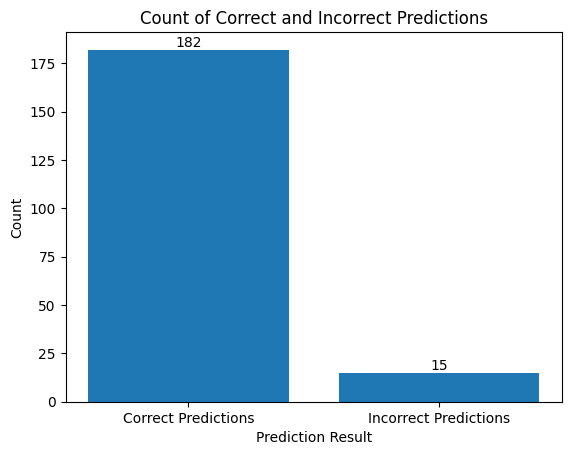

In [27]:
# Count the number of correct and incorrect predictions
correct_predictions2 = results_df2[results_df2['True_Label'] == results_df2['Predicted_Label']].shape[0]
incorrect_predictions2 = results_df2[results_df2['True_Label'] != results_df2['Predicted_Label']].shape[0]

# Create a bar plot
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_predictions2, incorrect_predictions2])
plt.xlabel('Prediction Result')
plt.ylabel('Count')
plt.title('Count of Correct and Incorrect Predictions')

# Add count labels above the bars
for i, count in enumerate([correct_predictions2, incorrect_predictions2]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### c) Random Forest

In [28]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest model
rf = RandomForestClassifier()

# Perform Grid Search Cross-Validation with 10 folds
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new Random Forest model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Fit the model to the training data
best_rf.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(max_depth=20)

In [29]:
# Predict on the test data
y_pred_rf = best_rf.predict(X_test)

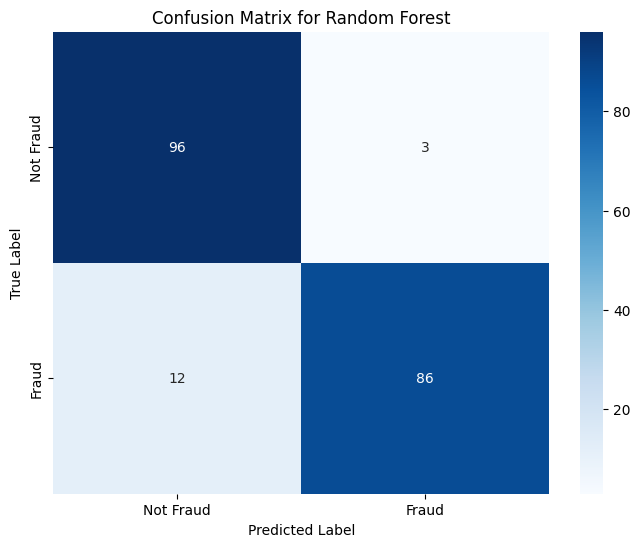

In [30]:
# Generate confusion matrix
cm3 = confusion_matrix(y_test, y_pred_svm)

# Define class labels
class_labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [31]:
# Generate and print classification report
class_dict = {0: 'Not Fraud', 1: 'Fraud'}
print(classification_report(y_test, y_pred_rf, target_names=class_dict.values(), digits=4))

              precision    recall  f1-score   support

   Not Fraud     0.9135    0.9596    0.9360        99
       Fraud     0.9570    0.9082    0.9319        98

    accuracy                         0.9340       197
   macro avg     0.9352    0.9339    0.9339       197
weighted avg     0.9351    0.9340    0.9340       197



In [32]:
# Create a DataFrame from the test features and predicted labels
results_df3 = pd.DataFrame(X_test)
results_df3['True_Label'] = y_test
results_df3['Predicted_Label'] = y_pred_rf

# Display the DataFrame
results_df3

,V3,V4,V7,V10,V11,V12,V14,V16,V17,True_Label,Predicted_Label
42756,-11.671043,8.807369,-13.616797,-12.888158,6.854953,-13.211695,-13.778956,-11.290328,-20.578022,1,1
1686,2.647870,1.408111,0.960251,1.346832,-0.622458,0.516210,-2.023273,-2.036791,0.653358,0,0
111690,-3.917586,3.920748,-3.614445,-4.684233,4.376907,-5.007441,-6.192475,-3.316934,-6.188834,1,1
128360,0.793623,-0.218410,0.363563,-0.774565,-1.133336,-0.066681,0.500851,0.149958,-0.210491,0,0
20746,0.485043,1.343874,-0.076665,0.065573,1.192505,0.810490,0.455426,-0.543406,0.138989,0,0
...,...,...,...,...,...,...,...,...,...,...,...
89723,1.069516,1.501387,-0.316986,-0.338931,-0.389865,1.288650,-0.552512,-1.000086,0.519668,0,0
200118,-1.787544,0.339969,0.084754,-0.760468,1.036545,0.956843,-1.423610,0.257045,0.873964,0,0
6641,-7.423894,7.380245,-1.496497,-3.944238,6.355078,-7.309748,-9.057993,-1.073117,1.524501,1,1
33631,0.765152,-1.183354,-1.044208,1.462230,-0.242670,-1.629023,0.093332,-0.336101,0.772681,0,0


In [33]:
# Reset index from the DataFrame
results_df3 = results_df3.reset_index(drop=True)

# Display the DataFrame
results_df3

,V3,V4,V7,V10,V11,V12,V14,V16,V17,True_Label,Predicted_Label
0,-11.671043,8.807369,-13.616797,-12.888158,6.854953,-13.211695,-13.778956,-11.290328,-20.578022,1,1
1,2.647870,1.408111,0.960251,1.346832,-0.622458,0.516210,-2.023273,-2.036791,0.653358,0,0
2,-3.917586,3.920748,-3.614445,-4.684233,4.376907,-5.007441,-6.192475,-3.316934,-6.188834,1,1
3,0.793623,-0.218410,0.363563,-0.774565,-1.133336,-0.066681,0.500851,0.149958,-0.210491,0,0
4,0.485043,1.343874,-0.076665,0.065573,1.192505,0.810490,0.455426,-0.543406,0.138989,0,0
...,...,...,...,...,...,...,...,...,...,...,...
192,1.069516,1.501387,-0.316986,-0.338931,-0.389865,1.288650,-0.552512,-1.000086,0.519668,0,0
193,-1.787544,0.339969,0.084754,-0.760468,1.036545,0.956843,-1.423610,0.257045,0.873964,0,0
194,-7.423894,7.380245,-1.496497,-3.944238,6.355078,-7.309748,-9.057993,-1.073117,1.524501,1,1
195,0.765152,-1.183354,-1.044208,1.462230,-0.242670,-1.629023,0.093332,-0.336101,0.772681,0,0


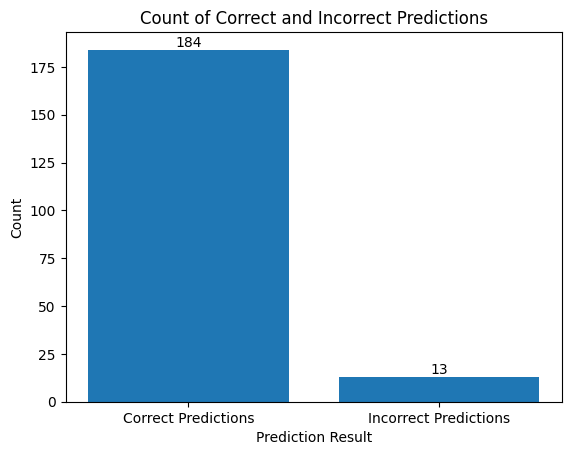

In [34]:
# Count the number of correct and incorrect predictions
correct_predictions3 = results_df3[results_df3['True_Label'] == results_df3['Predicted_Label']].shape[0]
incorrect_predictions3 = results_df3[results_df3['True_Label'] != results_df3['Predicted_Label']].shape[0]

# Create a bar plot
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_predictions3, incorrect_predictions3])
plt.xlabel('Prediction Result')
plt.ylabel('Count')
plt.title('Count of Correct and Incorrect Predictions')

# Add count labels above the bars
for i, count in enumerate([correct_predictions3, incorrect_predictions3]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### d) Naive Bayes

In [35]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Naive Bayes model
nb = GaussianNB()

# Perform Grid Search Cross-Validation with 10 folds
grid_search = GridSearchCV(nb, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new Naive Bayes model with the best hyperparameters
best_nb = GaussianNB(**best_params)

# Fit the model to the training data
best_nb.fit(X_train, y_train)

Best Hyperparameters: {'var_smoothing': 1e-09}


GaussianNB()

In [36]:
# Predict on the test data
y_pred_nb = best_nb.predict(X_test)

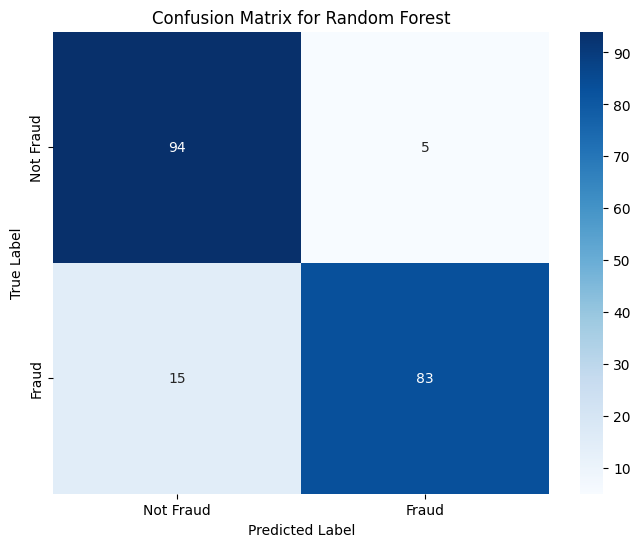

In [37]:
# Generate confusion matrix
cm4 = confusion_matrix(y_test, y_pred_nb)

# Define class labels
class_labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
# Generate and print classification report
class_dict = {0: 'Not Fraud', 1: 'Fraud'}
print(classification_report(y_test, y_pred_nb, target_names=class_dict.values(), digits=4))

              precision    recall  f1-score   support

   Not Fraud     0.8624    0.9495    0.9038        99
       Fraud     0.9432    0.8469    0.8925        98

    accuracy                         0.8985       197
   macro avg     0.9028    0.8982    0.8982       197
weighted avg     0.9026    0.8985    0.8982       197



In [39]:
# Create a DataFrame from the test features and predicted labels
results_df4 = pd.DataFrame(X_test)
results_df4['True_Label'] = y_test
results_df4['Predicted_Label'] = y_pred_nb

# Display the DataFrame
results_df4

,V3,V4,V7,V10,V11,V12,V14,V16,V17,True_Label,Predicted_Label
42756,-11.671043,8.807369,-13.616797,-12.888158,6.854953,-13.211695,-13.778956,-11.290328,-20.578022,1,1
1686,2.647870,1.408111,0.960251,1.346832,-0.622458,0.516210,-2.023273,-2.036791,0.653358,0,0
111690,-3.917586,3.920748,-3.614445,-4.684233,4.376907,-5.007441,-6.192475,-3.316934,-6.188834,1,1
128360,0.793623,-0.218410,0.363563,-0.774565,-1.133336,-0.066681,0.500851,0.149958,-0.210491,0,0
20746,0.485043,1.343874,-0.076665,0.065573,1.192505,0.810490,0.455426,-0.543406,0.138989,0,0
...,...,...,...,...,...,...,...,...,...,...,...
89723,1.069516,1.501387,-0.316986,-0.338931,-0.389865,1.288650,-0.552512,-1.000086,0.519668,0,0
200118,-1.787544,0.339969,0.084754,-0.760468,1.036545,0.956843,-1.423610,0.257045,0.873964,0,0
6641,-7.423894,7.380245,-1.496497,-3.944238,6.355078,-7.309748,-9.057993,-1.073117,1.524501,1,1
33631,0.765152,-1.183354,-1.044208,1.462230,-0.242670,-1.629023,0.093332,-0.336101,0.772681,0,0


In [40]:
# Reset index from the DataFrame
results_df4 = results_df4.reset_index(drop=True)

# Display the DataFrame
results_df4

,V3,V4,V7,V10,V11,V12,V14,V16,V17,True_Label,Predicted_Label
0,-11.671043,8.807369,-13.616797,-12.888158,6.854953,-13.211695,-13.778956,-11.290328,-20.578022,1,1
1,2.647870,1.408111,0.960251,1.346832,-0.622458,0.516210,-2.023273,-2.036791,0.653358,0,0
2,-3.917586,3.920748,-3.614445,-4.684233,4.376907,-5.007441,-6.192475,-3.316934,-6.188834,1,1
3,0.793623,-0.218410,0.363563,-0.774565,-1.133336,-0.066681,0.500851,0.149958,-0.210491,0,0
4,0.485043,1.343874,-0.076665,0.065573,1.192505,0.810490,0.455426,-0.543406,0.138989,0,0
...,...,...,...,...,...,...,...,...,...,...,...
192,1.069516,1.501387,-0.316986,-0.338931,-0.389865,1.288650,-0.552512,-1.000086,0.519668,0,0
193,-1.787544,0.339969,0.084754,-0.760468,1.036545,0.956843,-1.423610,0.257045,0.873964,0,0
194,-7.423894,7.380245,-1.496497,-3.944238,6.355078,-7.309748,-9.057993,-1.073117,1.524501,1,1
195,0.765152,-1.183354,-1.044208,1.462230,-0.242670,-1.629023,0.093332,-0.336101,0.772681,0,0


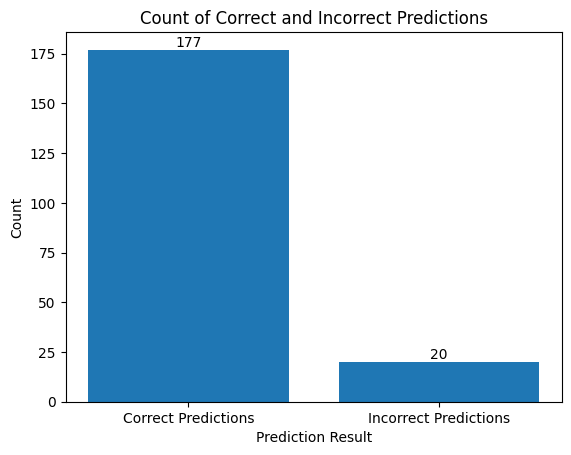

In [41]:
# Count the number of correct and incorrect predictions
correct_predictions4 = results_df4[results_df4['True_Label'] == results_df4['Predicted_Label']].shape[0]
incorrect_predictions4 = results_df4[results_df4['True_Label'] != results_df4['Predicted_Label']].shape[0]

# Create a bar plot
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct_predictions4, incorrect_predictions4])
plt.xlabel('Prediction Result')
plt.ylabel('Count')
plt.title('Count of Correct and Incorrect Predictions')

# Add count labels above the bars
for i, count in enumerate([correct_predictions4, incorrect_predictions4]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

## Model Comparison

In [42]:
# Calculate accuracy for each model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print accuracy values
print("Accuracy of Logistic Regression:", accuracy_logreg)
print("Accuracy of Support Vector Machine:", accuracy_svm)
print("Accuracy of Random Forest:", accuracy_rf)
print("Accuracy of Naive Bayes:", accuracy_nb)

Accuracy of Logistic Regression: 0.9137055837563451
Accuracy of Support Vector Machine: 0.9238578680203046
Accuracy of Random Forest: 0.934010152284264
Accuracy of Naive Bayes: 0.8984771573604061


In [43]:
# Create a DataFrame for model comparison
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [accuracy_logreg, accuracy_svm, accuracy_rf, accuracy_nb]
})

# Sort the DataFrame by accuracy in descending order
model_comparison_sorted = model_comparison.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
model_comparison_sorted

,Model,Accuracy
2,Random Forest,0.934010
1,Support Vector Machine,0.923858
0,Logistic Regression,0.913706
3,Naive Bayes,0.898477


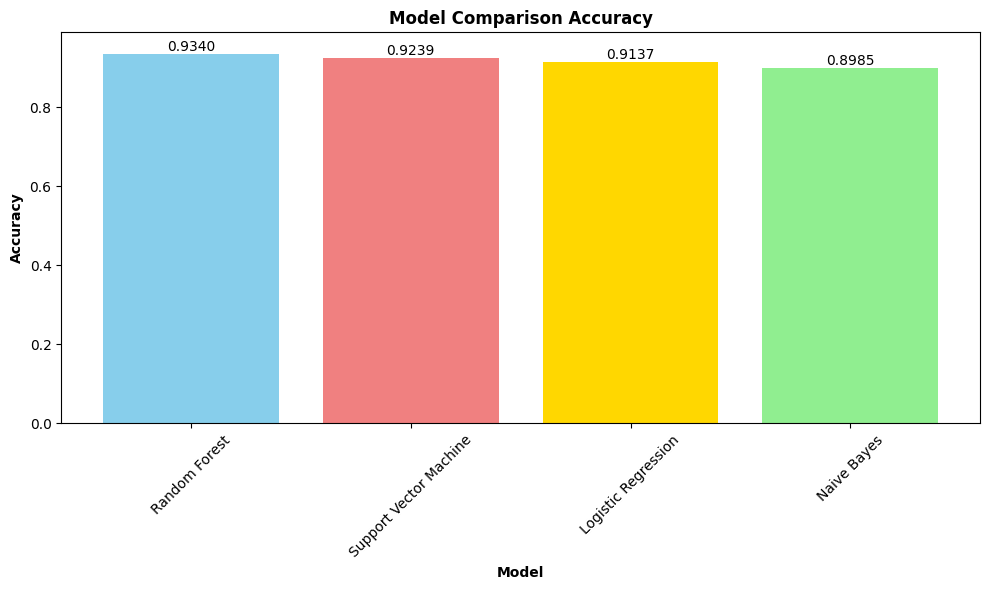

In [44]:
# Extract model names and accuracies
models = model_comparison_sorted['Model']
accuracies = model_comparison_sorted['Accuracy']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'gold', 'lightgreen'])
plt.ylim(0, 0.99)
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Model Comparison Accuracy', fontweight='bold')
plt.xticks(rotation=45)

# Add value labels above the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Conclusion

From the modeling stage, model training with hyperparameters, to model evaluation has proven that the model with the highest accuracy is Random Forest with an accuracy of 0.9340 or around 93.40%. The model is able to detect credit card fraud well with an optimal combination of parameters with GridSearchCV.

If you want to use this program code as a reference, you should first get permission from the program code owner by sending an email message to: singgih.hilman@gmail.com or hilmansinggihw@alumni.undip.ac.id.

---

© 2024 Copyright by Hilman Singgih Wicaksana. All right reserved.